# Case Study 1

#### Domain 

Media

#### Focus 

optimize selection process

#### Business challenge/requirement

Motion Studios is the largest Radio production house in Europe.  Their total revenue $ 1B+. Company has launched a new reality show – "The Star RJ".  The show is about finding a new Radio Jockey who will be the star presenter on upcoming shows. In first round participants have to upload their voice clip online and the clip will be evaluated by experts for selection into the next round. There is a separate team in the first round for evaluation of male and female voice. 

Response to the show is unprecedented and company is flooded with voice clips. You as a ML expert  have to classify the voice as either male/female so that first level of filtration is quicker.

#### Key issues

Voice sample are across accents

#### Considerations

The output from the pre-processed WAV files were saved into the CSV file

#### Data volume

Approx 3000  records 

#### File 

voice-classification.csv 

#### Fields in Data

meanfreq: mean frequency (in kHz)

sd: standard deviation of frequency

median: median frequency (in kHz)

Q25: first quantile (in kHz)

Q75: third quantile (in kHz)

IQR: interquantile range (in kHz)

skew: skewness (see note in specprop description)

kurt: kurtosis (see note in specprop description)

sp.ent: spectral entropy

sfm: spectral flatness

mode: mode frequency

centroid: frequency centroid (see specprop)

peakf: peak frequency (frequency with highest energy)

meanfun: average of fundamental frequency measured across acoustic signal

minfun: minimum fundamental frequency measured across acoustic signal

maxfun: maximum fundamental frequency measured across acoustic signal

meandom: average of dominant frequency measured across acoustic signal

mindom: minimum of dominant frequency measured across acoustic signal

maxdom: maximum of dominant frequency measured across acoustic signal

dfrange: range of dominant frequency measured across acoustic signal

modindx: modulation index. Calculated as the accumulated absolute difference between adjacent measurements of fundamental frequencies divided by the frequency range

label: male or female

#### Additional information

NA

#### Business benefits

Since "The Star RJ" is a reality show, time to select candidates is very short.  The whole success of the show and hence the profits depends upon quick and smooth execution.

### 1. Data Import, Pre-Processing & Basic EDA

In [1]:
# Import all required libraries. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Import data 
voice = pd.read_csv('voice-classification.csv')

In [3]:
# Check the sample top rows of the data.
voice.head()

meanfreq        sd    median       Q25       Q75       IQR       skew  \
0  0.059781  0.064241  0.032027  0.015071  0.090193  0.075122  12.863462   
1  0.066009  0.067310  0.040229  0.019414  0.092666  0.073252  22.423285   
2  0.077316  0.083829  0.036718  0.008701  0.131908  0.123207  30.757155   
3  0.151228  0.072111  0.158011  0.096582  0.207955  0.111374   1.232831   
4  0.135120  0.079146  0.124656  0.078720  0.206045  0.127325   1.101174   

          kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0   274.402906  0.893369  0.491918  ...    0.059781  0.084279  0.015702   
1   634.613855  0.892193  0.513724  ...    0.066009  0.107937  0.015826   
2  1024.927705  0.846389  0.478905  ...    0.077316  0.098706  0.015656   
3     4.177296  0.963322  0.727232  ...    0.151228  0.088965  0.017798   
4     4.333713  0.971955  0.783568  ...    0.135120  0.106398  0.016931   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.275862  0.007812  0.007812  0.007812  0.000000  0.000000   male  
1  0.250000  0.009014  0.007812  0.054688  0.046875  0.052632   male  
2  0.271186  0.007990  0.007812  0.015625  0.007812  0.046512   male  
3  0.250000  0.201497  0.007812  0.562500  0.554688  0.247119   male  
4  0.266667  0.712812  0.007812  5.484375  5.476562  0.208274   male  

[5 rows x 21 columns]

In [4]:
# Checking the information of the dataframe
# This will tell us about NULL or missing values in the data. 
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
# Checking the basic statistics of the data for the numeric fields. 
voice.describe()

meanfreq           sd       median          Q25          Q75  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.180907     0.057126     0.185621     0.140456     0.224765   
std       0.029918     0.016652     0.036360     0.048680     0.023639   
min       0.039363     0.018363     0.010975     0.000229     0.042946   
25%       0.163662     0.041954     0.169593     0.111087     0.208747   
50%       0.184838     0.059155     0.190032     0.140286     0.225684   
75%       0.199146     0.067020     0.210618     0.175939     0.243660   
max       0.251124     0.115273     0.261224     0.247347     0.273469   

               IQR         skew         kurt       sp.ent          sfm  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.084309     3.140168    36.568461     0.895127     0.408216   
std       0.042783     4.240529   134.928661     0.044980     0.177521   
min       0.014558     0.141735     2.068455     0.738651     0.036876   
25%       0.042560     1.649569     5.669547     0.861811     0.258041   
50%       0.094280     2.197101     8.318463     0.901767     0.396335   
75%       0.114175     2.931694    13.648905     0.928713     0.533676   
max       0.252225    34.725453  1309.612887     0.981997     0.842936   

              mode     centroid      meanfun       minfun       maxfun  \
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000   
mean      0.165282     0.180907     0.142807     0.036802     0.258842   
std       0.077203     0.029918     0.032304     0.019220     0.030077   
min       0.000000     0.039363     0.055565     0.009775     0.103093   
25%       0.118016     0.163662     0.116998     0.018223     0.253968   
50%       0.186599     0.184838     0.140519     0.046110     0.271186   
75%       0.221104     0.199146     0.169581     0.047904     0.277457   
max       0.280000     0.251124     0.237636     0.204082     0.279114   

           meandom       mindom       maxdom      dfrange      modindx  
count  3168.000000  3168.000000  3168.000000  3168.000000  3168.000000  
mean      0.829211     0.052647     5.047277     4.994630     0.173752  
std       0.525205     0.063299     3.521157     3.520039     0.119454  
min       0.007812     0.004883     0.007812     0.000000     0.000000  
25%       0.419828     0.007812     2.070312     2.044922     0.099766  
50%       0.765795     0.023438     4.992188     4.945312     0.139357  
75%       1.177166     0.070312     7.007812     6.992188     0.209183  
max       2.957682     0.458984    21.867188    21.843750     0.932374

As seen above, we have columns : skew, kert, maxdom, and dfrange : which have outliers, since the average value is quite far from the max. value. 

Clearly, the target variable 'label' is a character variable, which needs to be label encoded first as number. Also, feature scaling should be performed. 

In [6]:
# Importing library for scaling of data. 
from sklearn.preprocessing import StandardScaler

In [7]:
# Taking a list of all columns in the dataset. 
voice.columns

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')

In [11]:
# Creating separate list of feature variables. 
voice_features = ['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']

In [12]:
# Creating object of standard scaler. 
scaler_voice = StandardScaler()

In [16]:
# Scaling all feature variables in the dataset. 
voice[voice_features] = scaler_voice.fit(voice[voice_features]).transform(voice[voice_features])

In [17]:
# Checking the data post scaling
voice.head(10)

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778  2.293306   
1 -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485  4.548056   
2 -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326  6.513656   
3 -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690 -0.449858   
4 -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588 -0.480911   
5 -1.608666  1.347232 -1.830062 -1.489512 -0.641972  1.340093 -0.284822   
6 -1.007728  1.041300 -0.701821 -0.977084 -0.805857  0.666485 -0.379617   
7 -0.681717  1.179662 -1.135596 -0.614797  0.304495  0.867778 -0.411101   
8 -1.292650  1.254833 -1.293742 -1.073498 -0.684457  0.843266 -0.481247   
9 -1.557104  1.394871 -1.765105 -1.332913 -0.964981  0.983436 -0.459874   

       kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0  1.762946 -0.039083  0.471575  ...   -4.049248 -1.812038 -1.097998   
1  4.433008 -0.065236  0.594431  ...   -3.841053 -1.079594 -1.091533   
2  7.326207 -1.083730  0.398261  ...   -3.463066 -1.365368 -1.100397   
3 -0.240099  1.516383  1.797340  ...   -0.992157 -1.666966 -0.988934   
4 -0.238940  1.708336  2.114740  ...   -1.530640 -1.127233 -1.034015   
5 -0.209474  1.513245  1.859738  ...   -1.608666 -1.011625 -1.024592   
6 -0.226681  1.610899  1.996817  ...   -1.007728 -1.141269 -0.550156   
7 -0.235731  1.425930  1.755795  ...   -0.681717 -1.540413 -0.990989   
8 -0.240893  1.680938  2.043886  ...   -1.292650 -1.426586 -0.980618   
9 -0.235578  1.781516  2.232700  ...   -1.557104 -1.143237 -0.910731   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.565959 -1.564205 -0.708404 -1.431422 -1.419137 -1.454772   male  
1 -0.294030 -1.561916 -0.708404 -1.418107 -1.405818 -1.014103   male  
2  0.410480 -1.563866 -0.708404 -1.429203 -1.416917 -1.065344   male  
3 -0.294030 -1.195367 -0.708404 -1.273867 -1.261532  0.614286   male  
4  0.260185 -0.221660 -0.708404  0.124154  0.136933  0.289046   male  
5 -0.162074 -1.011172 -0.708404 -0.659181 -0.646652 -0.406846   male  
6  0.260185 -0.665733 -0.708404  0.075335  0.088098 -0.416623   male  
7 -3.814045 -1.005236 -0.708404 -1.280524 -1.268192  0.922549   male  
8 -0.294030 -0.938324 -0.708404 -0.818955 -0.806476 -0.213333   male  
9  0.114817 -0.930919 -0.584964 -0.099973 -0.089485 -0.701898   male  

[10 rows x 21 columns]

In [18]:
# Checking data statistics post scaling
voice.describe()

meanfreq            sd        median           Q25           Q75  \
count  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03   
mean   2.870880e-16 -3.588600e-16 -7.177199e-17 -3.588600e-17 -1.094523e-15   
std    1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00   
min   -4.731813e+00 -2.328145e+00 -4.803987e+00 -2.881056e+00 -7.692595e+00   
25%   -5.764854e-01 -9.112773e-01 -4.408861e-01 -6.034077e-01 -6.777227e-01   
50%    1.314406e-01  1.218739e-01  1.213526e-01 -3.475757e-03  3.889284e-02   
75%    6.097473e-01  5.942754e-01  6.876044e-01  7.290261e-01  7.994535e-01   
max    2.347370e+00  3.492409e+00  2.079633e+00  2.196155e+00  2.060643e+00   

                IQR          skew         kurt        sp.ent           sfm  \
count  3.168000e+03  3.168000e+03  3168.000000  3.168000e+03  3.168000e+03   
mean  -5.024040e-16 -7.177199e-17     0.000000  7.177199e-17 -2.870880e-16   
std    1.000158e+00  1.000158e+00     1.000158  1.000158e+00  1.000158e+00   
min   -1.630614e+00 -7.072008e-01    -0.255731 -3.479385e+00 -2.092137e+00   
25%   -9.759992e-01 -3.515680e-01    -0.229038 -7.408115e-01 -8.460943e-01   
50%    2.330866e-01 -2.224288e-01    -0.209403  1.476408e-01 -6.693925e-02   
75%    6.981837e-01 -4.916990e-02    -0.169891  7.468220e-01  7.068430e-01   
max    3.925441e+00  7.449607e+00     9.436434  1.931618e+00  2.449219e+00   

               mode      centroid       meanfun        minfun        maxfun  \
count  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03   
mean   1.435440e-16  2.870880e-16 -5.024040e-16  1.614870e-16  3.050310e-16   
std    1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00   
min   -2.141210e+00 -4.731813e+00 -2.701027e+00 -1.406398e+00 -5.179122e+00   
25%   -6.123269e-01 -5.764854e-01 -7.990335e-01 -9.667821e-01 -1.620744e-01   
50%    2.761577e-01  1.314406e-01 -7.084407e-02  4.843493e-01  4.104803e-01   
75%    7.231732e-01  6.097473e-01  8.289300e-01  5.777400e-01  6.189829e-01   
max    1.486164e+00  2.347370e+00  2.935963e+00  8.704820e+00  6.740922e-01   

            meandom        mindom        maxdom       dfrange       modindx  
count  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  
mean   2.332590e-16 -8.971499e-17  7.177199e-17 -1.794300e-17 -4.485750e-17  
std    1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  
min   -1.564205e+00 -7.546946e-01 -1.431422e+00 -1.419137e+00 -1.454772e+00  
25%   -7.795958e-01 -7.084043e-01 -8.455841e-01 -8.381082e-01 -6.194614e-01  
50%   -1.207645e-01 -4.615229e-01 -1.564768e-02 -1.401262e-02 -2.879753e-01  
75%    6.626172e-01  2.791215e-01  5.568753e-01  5.675713e-01  2.966600e-01  
max    4.053288e+00  6.420297e+00  4.777568e+00  4.787384e+00  6.351733e+00

In [19]:
# Now performing label encoding on the target variable. 

# Importing library for encoding. 
from sklearn.preprocessing import LabelEncoder

# Creating object for label encoding. 
le_voice = LabelEncoder()

# Fitting the data. 
voice.label = le_voice.fit(voice.label).transform(voice.label)

In [20]:
# Finally checking the output dataframe information. 
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null int64
dtypes: float64(20), int64(1)
memory usage: 519.8 KB


In [21]:
# Checking the sample rows once more. 
voice.head(10)

meanfreq        sd    median       Q25       Q75       IQR      skew  \
0 -4.049248  0.427355 -4.224901 -2.576102 -5.693607 -0.214778  2.293306   
1 -3.841053  0.611669 -3.999293 -2.486885 -5.588987 -0.258485  4.548056   
2 -3.463066  1.603848 -4.095851 -2.706986 -3.928699  0.909326  6.513656   
3 -0.992157  0.899998 -0.759454 -0.901418 -0.711205  0.632690 -0.449858   
4 -1.530640  1.322561 -1.676948 -1.268395 -0.792029  1.005588 -0.480911   
5 -1.608666  1.347232 -1.830062 -1.489512 -0.641972  1.340093 -0.284822   
6 -1.007728  1.041300 -0.701821 -0.977084 -0.805857  0.666485 -0.379617   
7 -0.681717  1.179662 -1.135596 -0.614797  0.304495  0.867778 -0.411101   
8 -1.292650  1.254833 -1.293742 -1.073498 -0.684457  0.843266 -0.481247   
9 -1.557104  1.394871 -1.765105 -1.332913 -0.964981  0.983436 -0.459874   

       kurt    sp.ent       sfm  ...    centroid   meanfun    minfun  \
0  1.762946 -0.039083  0.471575  ...   -4.049248 -1.812038 -1.097998   
1  4.433008 -0.065236  0.594431  ...   -3.841053 -1.079594 -1.091533   
2  7.326207 -1.083730  0.398261  ...   -3.463066 -1.365368 -1.100397   
3 -0.240099  1.516383  1.797340  ...   -0.992157 -1.666966 -0.988934   
4 -0.238940  1.708336  2.114740  ...   -1.530640 -1.127233 -1.034015   
5 -0.209474  1.513245  1.859738  ...   -1.608666 -1.011625 -1.024592   
6 -0.226681  1.610899  1.996817  ...   -1.007728 -1.141269 -0.550156   
7 -0.235731  1.425930  1.755795  ...   -0.681717 -1.540413 -0.990989   
8 -0.240893  1.680938  2.043886  ...   -1.292650 -1.426586 -0.980618   
9 -0.235578  1.781516  2.232700  ...   -1.557104 -1.143237 -0.910731   

     maxfun   meandom    mindom    maxdom   dfrange   modindx  label  
0  0.565959 -1.564205 -0.708404 -1.431422 -1.419137 -1.454772      1  
1 -0.294030 -1.561916 -0.708404 -1.418107 -1.405818 -1.014103      1  
2  0.410480 -1.563866 -0.708404 -1.429203 -1.416917 -1.065344      1  
3 -0.294030 -1.195367 -0.708404 -1.273867 -1.261532  0.614286      1  
4  0.260185 -0.221660 -0.708404  0.124154  0.136933  0.289046      1  
5 -0.162074 -1.011172 -0.708404 -0.659181 -0.646652 -0.406846      1  
6  0.260185 -0.665733 -0.708404  0.075335  0.088098 -0.416623      1  
7 -3.814045 -1.005236 -0.708404 -1.280524 -1.268192  0.922549      1  
8 -0.294030 -0.938324 -0.708404 -0.818955 -0.806476 -0.213333      1  
9  0.114817 -0.930919 -0.584964 -0.099973 -0.089485 -0.701898      1  

[10 rows x 21 columns]

In [22]:
# Checking the descriptive statistics of the dataframe once more as well. 
voice.describe()

meanfreq            sd        median           Q25           Q75  \
count  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03   
mean   2.870880e-16 -3.588600e-16 -7.177199e-17 -3.588600e-17 -1.094523e-15   
std    1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00   
min   -4.731813e+00 -2.328145e+00 -4.803987e+00 -2.881056e+00 -7.692595e+00   
25%   -5.764854e-01 -9.112773e-01 -4.408861e-01 -6.034077e-01 -6.777227e-01   
50%    1.314406e-01  1.218739e-01  1.213526e-01 -3.475757e-03  3.889284e-02   
75%    6.097473e-01  5.942754e-01  6.876044e-01  7.290261e-01  7.994535e-01   
max    2.347370e+00  3.492409e+00  2.079633e+00  2.196155e+00  2.060643e+00   

                IQR          skew         kurt        sp.ent           sfm  \
count  3.168000e+03  3.168000e+03  3168.000000  3.168000e+03  3.168000e+03   
mean  -5.024040e-16 -7.177199e-17     0.000000  7.177199e-17 -2.870880e-16   
std    1.000158e+00  1.000158e+00     1.000158  1.000158e+00  1.000158e+00   
min   -1.630614e+00 -7.072008e-01    -0.255731 -3.479385e+00 -2.092137e+00   
25%   -9.759992e-01 -3.515680e-01    -0.229038 -7.408115e-01 -8.460943e-01   
50%    2.330866e-01 -2.224288e-01    -0.209403  1.476408e-01 -6.693925e-02   
75%    6.981837e-01 -4.916990e-02    -0.169891  7.468220e-01  7.068430e-01   
max    3.925441e+00  7.449607e+00     9.436434  1.931618e+00  2.449219e+00   

          ...           centroid       meanfun        minfun        maxfun  \
count     ...       3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03   
mean      ...       2.870880e-16 -5.024040e-16  1.614870e-16  3.050310e-16   
std       ...       1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00   
min       ...      -4.731813e+00 -2.701027e+00 -1.406398e+00 -5.179122e+00   
25%       ...      -5.764854e-01 -7.990335e-01 -9.667821e-01 -1.620744e-01   
50%       ...       1.314406e-01 -7.084407e-02  4.843493e-01  4.104803e-01   
75%       ...       6.097473e-01  8.289300e-01  5.777400e-01  6.189829e-01   
max       ...       2.347370e+00  2.935963e+00  8.704820e+00  6.740922e-01   

            meandom        mindom        maxdom       dfrange       modindx  \
count  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03  3.168000e+03   
mean   2.332590e-16 -8.971499e-17  7.177199e-17 -1.794300e-17 -4.485750e-17   
std    1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00  1.000158e+00   
min   -1.564205e+00 -7.546946e-01 -1.431422e+00 -1.419137e+00 -1.454772e+00   
25%   -7.795958e-01 -7.084043e-01 -8.455841e-01 -8.381082e-01 -6.194614e-01   
50%   -1.207645e-01 -4.615229e-01 -1.564768e-02 -1.401262e-02 -2.879753e-01   
75%    6.626172e-01  2.791215e-01  5.568753e-01  5.675713e-01  2.966600e-01   
max    4.053288e+00  6.420297e+00  4.777568e+00  4.787384e+00  6.351733e+00   

             label  
count  3168.000000  
mean      0.500000  
std       0.500079  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000  

[8 rows x 21 columns]

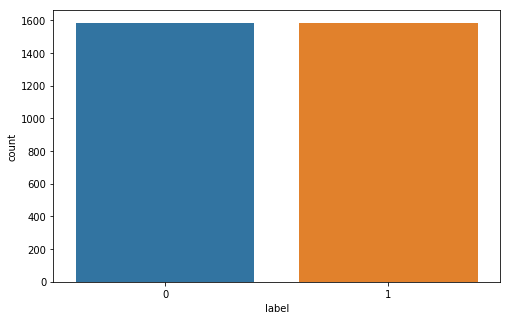

In [50]:
# PLot to see the distribution of labels in the dataset. 
plt.figure(figsize=(8, 5))
sns.countplot(voice.label)
plt.show()

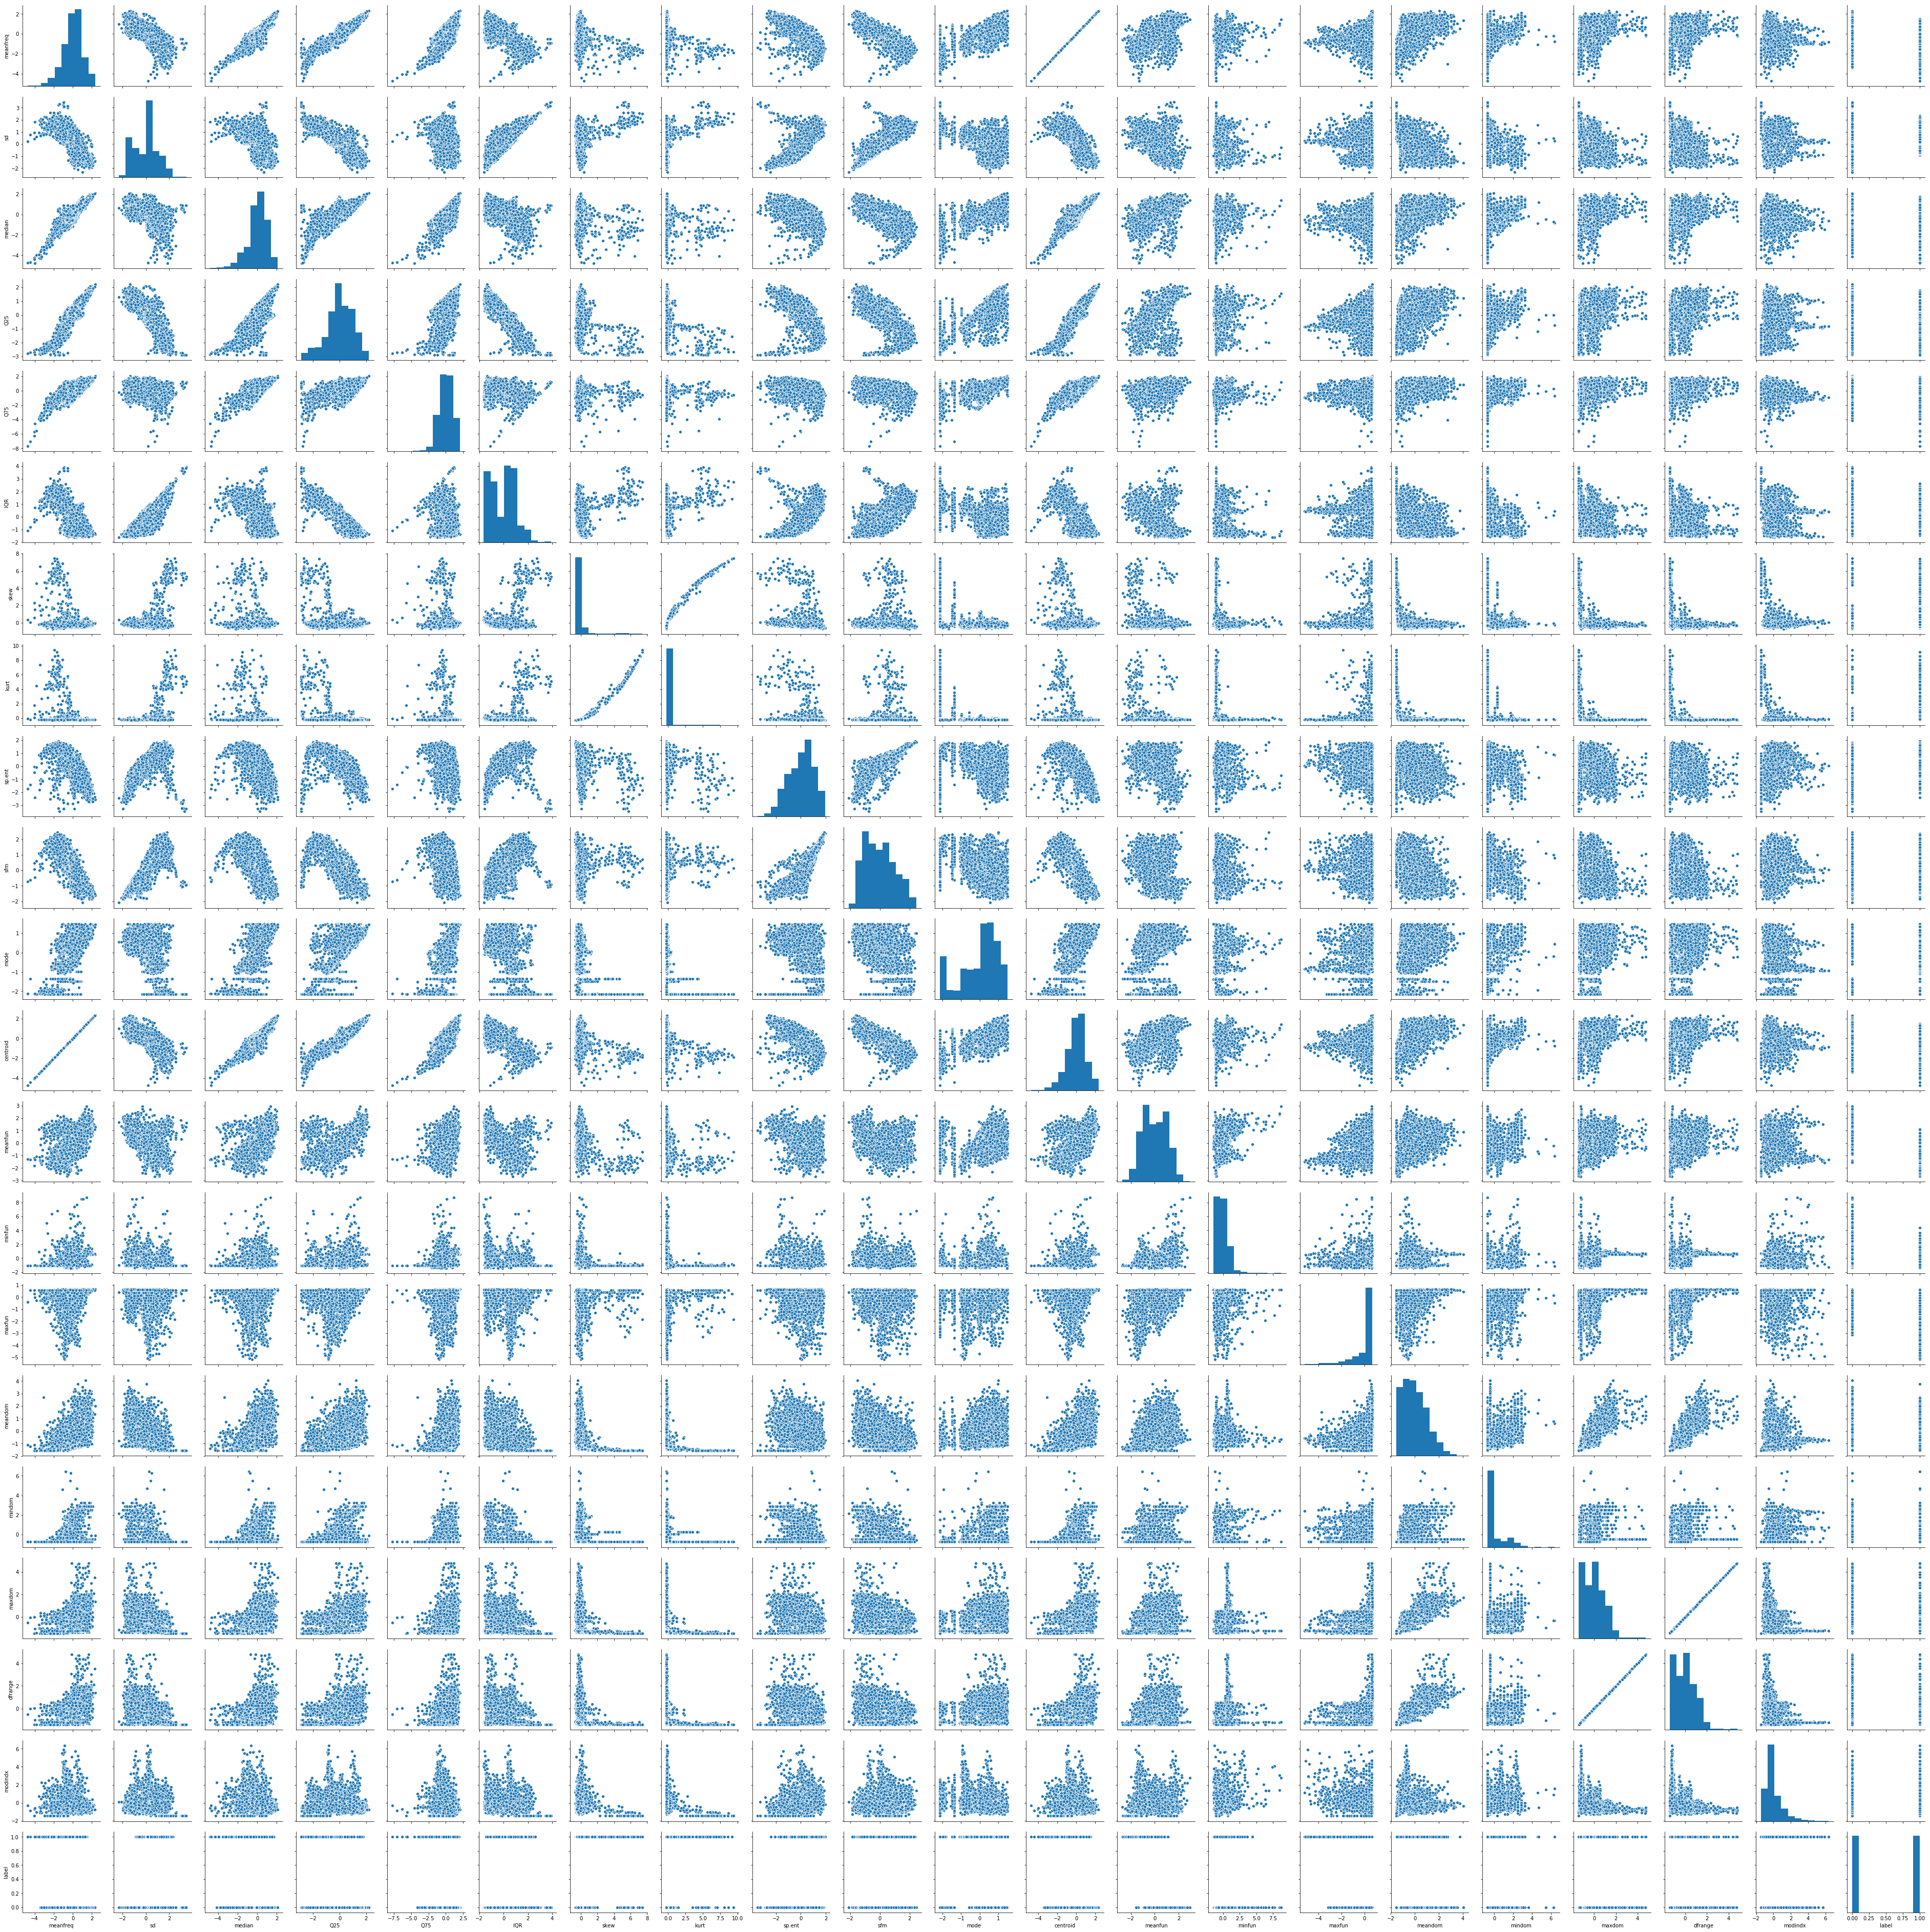

In [25]:
# Checking pairplots of the entire dataset. 
sns.pairplot(voice)

Although not clearly visible, because of the number of features involved here, but it is clear that very few variables are close to being normally distributed, while the rest are either left- or right-skewed. Interestingly, there are a few which also shows quite strong correlation/relationship amongst each other. 

### 2. Initial Modelling

At this initial stage, we will create an SVM Model to perform the classification. Later on, we will perform dimensionality reduction to get our features reduced. 

In [57]:
# Importing the required libraries. 
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [58]:
# Creating dataframe of feature columns. 
X = voice[['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx']]

In [59]:
# Creating dataframe of target variable. 
y = voice.label

In [62]:
# Importing library to create train test split of data. 
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

In [63]:
# Creating object of SVM Classifier.
initial_voice_clf = SVC()

In [64]:
# fitting the training data. 
initial_voice_clf.fit(x_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [65]:
# Getting the predictions. 
init_y_pred = initial_voice_clf.predict(x_test)

In [66]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",round(metrics.accuracy_score(y_test, init_y_pred)*100,2))

Accuracy: 98.11


In [67]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(y_test, init_y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(y_test, init_y_pred))

Precision: 0.9858585858585859
Recall: 0.9779559118236473


The initial model, built above, without any specific parameters being used, produces very good results overall. The accuracy is 98% approx. and the values of Precision and Recall are also quite good. Further, to validate the model and to make it better, we must perform tuning of the model. 

### 3. Model Improvement

Before application of PCA to reduce the features in the dataset, we will perform Grid Search Cross Validation method to find out the optimal values of Gamma and C which are Hyper-Parameters in ou SVM Classifier Model. 

Once we find this, we will tune our model accordingly, and then later on, proceed with PCA. 

In [68]:
# Importing required libraries. 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [69]:
# as a start, creating a K-Fold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# firstly, we will specify range of hyperparameters - later, we will set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3],
                     'C': [1, 10, 100]}]


# specify model with RBF kernel. 
rbf_voice_clf = SVC(kernel="rbf")

# set up GridSearchCV()
rbf_voice_clf_cv = GridSearchCV(estimator = rbf_voice_clf, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                        n_jobs=-1)      

# fit the model
rbf_voice_clf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   31.5s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001], 'C': [1, 10, 100]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

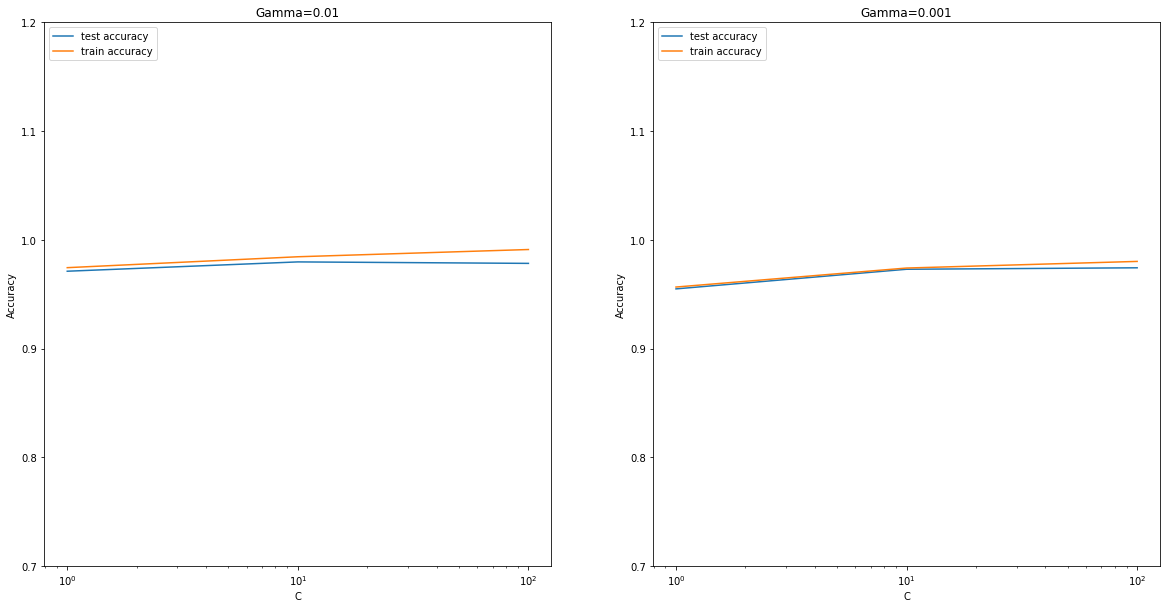

In [70]:
# cv results
cv_results = pd.DataFrame(rbf_voice_clf_cv.cv_results_)
cv_results

# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(20,10))

# subplot 1/2
plt.subplot(121)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/2
plt.subplot(122)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1.2])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [72]:
# printing the optimal accuracy score and hyperparameters
best_score = rbf_voice_clf_cv.best_score_
best_hyperparams = rbf_voice_clf_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.979702300405954 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


As seen above, using Grid Search Cross Validation method, we find that C should be = 10 and gamma should be 0.01 with RBF Kernel for our model to produce a 98% accuracy. 

In [73]:
# model with optimal hyperparameters

# create the model
rbf_voice_final = SVC(C=10, gamma=0.001, kernel="rbf")

# fit the model 
rbf_voice_final.fit(x_train, y_train)

# predict using test data. 
y_pred_rbf = rbf_voice_final.predict(x_test)

# metrics of test data. 
print("Accuracy of our model : ", metrics.accuracy_score(y_test, y_pred_rbf), "\n")

Accuracy of our model :  0.9747634069400631 



Finally, let's perform PCA (Principal Component Analysis) now, to find the optimal parameters and also to improve our model. The aim is not to increase the accuracy, but to ensure that our model is more stable. 

In [75]:
# Import PCA library in SKLearn
from sklearn.decomposition import PCA

# Make an instance of the Model
pca_voice = PCA(.95)

# Fitting the Training and Testing data on above PCA. 
pca_voice.fit(x_train)
x_train_pca = pca_voice.transform(x_train)
x_test_pca = pca_voice.transform(x_test)

# print the number of components selected by PCA. 
print("No Of Components selected via PCA: ", pca_voice.n_components_)

# model with optimal hyperparameters

# create the model
model_voice_pca = SVC(C=10, gamma=0.001, kernel="rbf")

# fit the model 
model_voice_pca.fit(x_train_pca, y_train)

# predict using test data. 
y_pred_pca = model_voice_pca.predict(x_test_pca)

# metrics of test data. 
print("Accuracy of our model post PCA : ", metrics.accuracy_score(y_test, y_pred_pca), "\n")

No Of Components selected via PCA:  10
Accuracy of our model post PCA :  0.9747634069400631 



Hereby, we find that by making use of 10 components from the data-set, we are able to achieve a 97% accuracy of our SVM Classifier model. Finally, let's try and find out the features which explain most of the variance in our data and our model, as found from the PCA. 

In [77]:
# Checking the explained variance ratio as found in PCA
pca_voice.explained_variance_ratio_

array([0.45342385, 0.11830092, 0.10817477, 0.07597133, 0.05346921,
       0.04621737, 0.03225247, 0.02927769, 0.02376375, 0.01865699])

In [79]:
# Taking the count of PCA components. 
n_pcs= pca_voice.components_.shape[0]
n_pcs

10

In [80]:
# get the index of the most important feature on EACH component i.e. largest absolute value
most_important = [np.abs(pca_voice.components_[i]).argmax() for i in range(n_pcs)]
most_important 

[11, 8, 7, 4, 12, 13, 16, 19, 14, 10]

In [81]:
# getting most important features. 
most_important_names = [voice_features[most_important[i]] for i in range(n_pcs)]

In [82]:
# creating the dictionary for getting the list of important fatures. 
dic_voice_imp_fields = {'PC{}'.format(i+1): most_important_names[i] for i in range(n_pcs)}

In [84]:
# building a dataframe to get list of columns
df_voice_imp_fields = pd.DataFrame(sorted(dic_voice_imp_fields.items()))
df_voice_imp_fields

0         1
0   PC1  centroid
1  PC10      mode
2   PC2    sp.ent
3   PC3      kurt
4   PC4       Q75
5   PC5   meanfun
6   PC6    minfun
7   PC7    mindom
8   PC8   modindx
9   PC9    maxfun

As seen above, the variables centroid, mode, sn.ent, kurt, Q75, meanfun, minfun, mindom, modindx and maxfun are the most important features in the dataset which helps to decide whether the voice is male or female. 